<a href="https://colab.research.google.com/github/kykytsapol/-YouTube-/blob/main/%D0%A1%D0%B5%D0%BD%D1%82%D0%B8%D0%BC%D0%B5%D0%BD%D1%82_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

загружаю размеченные данные из твиттера

In [ ]:
df = pd.read_excel("10к_сентиментов.xlsx", index_col=0)
df.head()

,text_clear,label
91169,нетленка сети стесняемся заходим смотрим оцени...,1
102625,азаза ванга разрешила спокоен,1
129280,сегодня последняя серия молодежки пойду поплач...,0
43840,красивый желанный пока произнёс слова дзеуки д...,1
141571,чет сегодня радио т лагает детски,0


In [ ]:
# 1 pos, 0 neg

In [ ]:
X = df['text_clear']
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
#настраиваем класс CountVectorizer- предупреждаем, что отбираем токены с частотностью не менее 2
vectorizer = CountVectorizer(min_df=2, max_features=10000)
#далее подаем в метод transform класса CountVectorizer столбец Текст_на_векторизацию
train_vectors = vectorizer.fit_transform(X_train.values.astype('U'))
test_vectors = vectorizer.transform(X_test.values.astype('U'))

In [ ]:
# обучаю модель на тестовом сете
model = SVC()
model.fit(train_vectors, y_train)
 
# предсказываю результаты и вывожу оценку предсказания
predictions = model.predict(test_vectors)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68     16329
           1       0.69      0.77      0.73     16671

    accuracy                           0.71     33000
   macro avg       0.71      0.71      0.71     33000
weighted avg       0.71      0.71      0.71     33000



Результаты не такие уж плохие, общая доль правильный прдсказаний 0,58 или 58% 

Далее я хочу подобрать оптимальные гиперпараметры с помощью "сетки"

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(train_vectors, y_train)

In [ ]:
# выводим лучшие параметры после обучения
print(grid.best_params_)
 
# вот как наша модель выглядит после настройки гиперпараметров
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [ ]:
# обучаю модель на тестовом сете
model = SVC(C=100, gamma=0.001)
model.fit(train_vectors, y_train)
 
# теперь посмотрим как наша модель работает на данных, которые она никогда не видела - на тестовом множестве
predictions = model.predict(test_vectors)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68     16268
           1       0.69      0.75      0.71     16732

    accuracy                           0.70     33000
   macro avg       0.70      0.70      0.70     33000
weighted avg       0.70      0.70      0.70     33000



In [ ]:
# лучшее значение точности на обучающем множестве
model.score(train_vectors, y_train)

0.7683880597014925

Итак, на тестовом множестве общая доля правильно предсказанных значений равна 65%. Модель почти одинаково предсказывает как негавтиный характер твитов, так и позитивный (67% и 63%, соотвественно). 


Также можно еще вывести roc кривую

In [ ]:
def get_roc_curve(model, X, y):
    pred = model.predict(X)
    fpr, tpr, _ = roc_curve(y, pred)
    return fpr, tpr

In [ ]:
roc_svm = get_roc_curve(model, test_vectors, y_test)

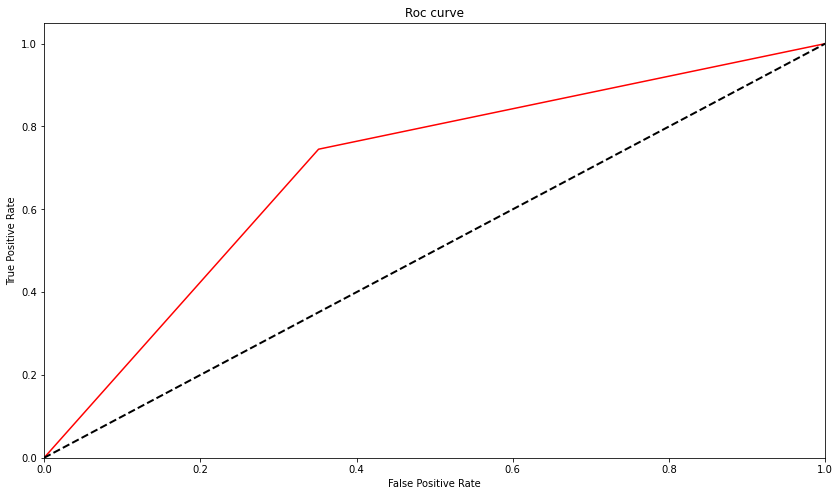

In [ ]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

Матрица ошибок

Text(23.999999999999996, 0.5, 'Actual')

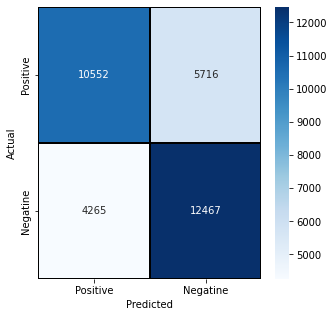

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Positive','Negatine'], 
            yticklabels = ['Positive','Negatine'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

Определим тональность наших данных - комментриев под видео о Картах Таро

In [ ]:
data1 = pd.read_excel("доминирующие_топики_доковида.xlsx", usecols = 'F, G')
data1.head()

,Оригинальный_текст,Преобразованный_текст
0,Эксперты раскрывают многие магические секреты....,эксперт раскрывать многий магический секрет хо...
1,гаданием на картах таро увлеклась моя знакомая...,гадание карта таро увлекаться знакомый дом при...
2,Любовь надо искать на своей улице....мораль се...,любовь искать улица мораль сей басня худо добро
3,"Деньги это не главное , главное Любовь на всю...",деньги главный главное любовь
4,моя бабушка любит мистические истории,бабушка любить мистический история


In [ ]:
text = vectorizer.transform(data1["Преобразованный_текст"].values.astype('U'))

In [ ]:
sentiment_text = model.predict(text)

In [ ]:
data1['sentiment_text'] = sentiment_text
data1

,Оригинальный_текст,Преобразованный_текст,sentiment_text
0,Эксперты раскрывают многие магические секреты....,эксперт раскрывать многий магический секрет хо...,0
1,гаданием на картах таро увлеклась моя знакомая...,гадание карта таро увлекаться знакомый дом при...,1
2,Любовь надо искать на своей улице....мораль се...,любовь искать улица мораль сей басня худо добро,1
3,"Деньги это не главное , главное Любовь на всю...",деньги главный главное любовь,1
4,моя бабушка любит мистические истории,бабушка любить мистический история,1
...,...,...,...
30400,Хочется узнать есть ли у меня порча или нет.,хотеться узнавать порча,0
30401,Rima Versuliene . А я не видела себя. Значит в...,видеть ерунда,1
30402,О ком вы хотели сказать.Мне на самом деле очен...,самый дело плохо,0
30403,"Аня ты умничка, весь расклад совпадает",умничек расклад совпадать,1


In [ ]:
# смотрим сколько всего негавтивных и позитивных текстов.
data1.groupby('sentiment_text').sentiment_text.count()

sentiment_text
0     7600
1    22805
Name: sentiment_text, dtype: int64

In [ ]:
data11 = pd.read_excel("доминирующие_топики_послековида.xlsx", usecols = 'F, G')
data11.head()

,Оригинальный_текст,Преобразованный_текст
0,тайм-коды:\n0:10 - Флаг! ⚡\n0:25 - до начала э...,тайм код флаг начало эфир эхо москва детск...
1,Жаль до моргенштерна не добрались.,жаль моргенштерн добираться
2,"Невзоров в перерыве, говоря о Вассермане, сказ...",невзоров перерыв говоритьссерман настольпотряс...
3,"Многие удивляются, - а почему так быстро свари...",многие удивляться быстро свариватькцина причем...
4,Спасибо! Про Дуню забавно. А что если и Вассер...,дуня забавноссерман баба сиська борода похоже ...


In [ ]:
text = vectorizer.transform(data11["Преобразованный_текст"].values.astype('U'))

In [ ]:
sentiment_text = model.predict(text)

In [ ]:
data11['sentiment_text'] = sentiment_text
data11

,Оригинальный_текст,Преобразованный_текст,sentiment_text
0,тайм-коды:\n0:10 - Флаг! ⚡\n0:25 - до начала э...,тайм код флаг начало эфир эхо москва детск...,1
1,Жаль до моргенштерна не добрались.,жаль моргенштерн добираться,0
2,"Невзоров в перерыве, говоря о Вассермане, сказ...",невзоров перерыв говоритьссерман настольпотряс...,1
3,"Многие удивляются, - а почему так быстро свари...",многие удивляться быстро свариватькцина причем...,0
4,Спасибо! Про Дуню забавно. А что если и Вассер...,дуня забавноссерман баба сиська борода похоже ...,1
...,...,...,...
54782,шанс всегда хорошо виден - распознать нетрудно...,шанс видный распознавать нетрудно трудно решаться,0
54783,Ю\n\n\n\n\n\n\n\n\n\nЮ,ю ю,1
54784,А сами расклад смотрите?????? Зачем???,расклад смотреть,1
54785,Та же самая история!!!,самый история,1


In [ ]:
# смотрим сколько всего негавтивных и позитивных текстов.
data11.groupby('sentiment_text').sentiment_text.count()

sentiment_text
0    15709
1    39078
Name: sentiment_text, dtype: int64

In [ ]:
data1.to_excel('оценка_тональности_всех_текстов_доковида_svm.xlsx')
data11.to_excel('оценка_тональности_всех_текстов_послековида_svm.xlsx')

Далее посмотрим на тональность топиков до и после ковида 

доковида (определяем тональность по ключевым словам)

In [ ]:
data2 = pd.read_excel("только_топики_доковида.xlsx", index_col = 0)
data2.head()

,Ключевые_слова
Топик,
0,"расклад, знать, благодарить, хороший, отношени..."
1,"таро, благодарить, видео, огромный, большой, к..."
2,"карта, колода, вопрос, таро, говорить, мир, ар..."


In [ ]:
topic1 = vectorizer.transform(data2["Ключевые_слова"])

In [ ]:
sentiment_topic = model.predict(topic1)

In [ ]:
data2['sentiment_text'] = sentiment_topic
data2

,Ключевые_слова,sentiment_text
Топик,,
0,"расклад, знать, благодарить, хороший, отношени...",1
1,"таро, благодарить, видео, огромный, большой, к...",1
2,"карта, колода, вопрос, таро, говорить, мир, ар...",0


In [ ]:
data3 = pd.read_excel("только_топики_послековида.xlsx", index_col = 0)
data3

,Ключевые_слова
Топик,
0,"март, февраль, карта, прогноз, выходить, месяц..."
1,"ребенок, жить, друг, любить, мужчина, женщина,..."
2,"благодарить, благо, желать, счастие, бог, дава..."
3,"говорить, игра, знак, язык, ангел, сила, война..."
4,"понимать, видеть, говорить, слово, помогать, в..."
5,"расклад, благодарить, смотреть, делать, вопрос..."
6,"таро, канал, видео, карта, комментарий, поддер..."
7,"украина, россия, мир, война, страна, донбасс, ..."


In [ ]:
topic2 = vectorizer.transform(data3["Ключевые_слова"])

In [ ]:
sentiment_topic = model.predict(topic2)

In [ ]:
data3['sentiment_text'] = sentiment_topic
data3

,Ключевые_слова,sentiment_text
Топик,,
0,"март, февраль, карта, прогноз, выходить, месяц...",1
1,"ребенок, жить, друг, любить, мужчина, женщина,...",1
2,"благодарить, благо, желать, счастие, бог, дава...",1
3,"говорить, игра, знак, язык, ангел, сила, война...",1
4,"понимать, видеть, говорить, слово, помогать, в...",1
5,"расклад, благодарить, смотреть, делать, вопрос...",1
6,"таро, канал, видео, карта, комментарий, поддер...",1
7,"украина, россия, мир, война, страна, донбасс, ...",1


посмотрим на тональность доминирующих текстов в каждом топике

In [ ]:
data3 = pd.read_excel("доминирующие_текста_доковида.xlsx", index_col = 0)
data3.head()

,Номер_документа,Доминирующий_топик,Процентный_вклад,Ключевые_слова,Оригинальный_текст,Преобразованный_текст
947,947,0,0.9830,"расклад, знать, благодарить, хороший, отношени...",Аленочка я загадала почему-то две позиции и од...,а загадывать позиция дополнять и ю скащать ме...
471,471,0,0.9819,"расклад, знать, благодарить, хороший, отношени...","По 2-ому варианту, был светлый молодой человек...",ом вариант светлый молодой общаться расстояни...
433,433,0,0.9793,"расклад, знать, благодарить, хороший, отношени...","Всем,добрый день!На самом деле по всем гадания...",добрый самый дело гадание идти буква андрей мо...
1912,1912,0,0.9773,"расклад, знать, благодарить, хороший, отношени...","Елена, Вы абсолютно правы, самое главное в Ваш...",абсолютно правый самый главный расклад совет ...
743,743,0,0.9757,"расклад, знать, благодарить, хороший, отношени...","Алёна,Благодарю!за 2 в.,проигралось так....Был...",благодарить проигрываться светлый молодой ра...


In [ ]:
text1 = vectorizer.transform(data3["Преобразованный_текст"].values.astype('U'))

In [ ]:
sentiment_text = model.predict(text1)

In [ ]:
data3['sentiment_text'] = sentiment_text
data3

,Номер_документа,Доминирующий_топик,Процентный_вклад,Ключевые_слова,Оригинальный_текст,Преобразованный_текст,sentiment_text
947,947,0,0.9830,"расклад, знать, благодарить, хороший, отношени...",Аленочка я загадала почему-то две позиции и од...,а загадывать позиция дополнять и ю скащать ме...,1
471,471,0,0.9819,"расклад, знать, благодарить, хороший, отношени...","По 2-ому варианту, был светлый молодой человек...",ом вариант светлый молодой общаться расстояни...,1
433,433,0,0.9793,"расклад, знать, благодарить, хороший, отношени...","Всем,добрый день!На самом деле по всем гадания...",добрый самый дело гадание идти буква андрей мо...,1
1912,1912,0,0.9773,"расклад, знать, благодарить, хороший, отношени...","Елена, Вы абсолютно правы, самое главное в Ваш...",абсолютно правый самый главный расклад совет ...,0
743,743,0,0.9757,"расклад, знать, благодарить, хороший, отношени...","Алёна,Благодарю!за 2 в.,проигралось так....Был...",благодарить проигрываться светлый молодой ра...,0
4868,4868,1,0.9736,"таро, благодарить, видео, огромный, большой, к...",Очень доходчиво обясняете! По сути! \nБлагодар...,доходчиво обяснять благодаря видео обогащаться...,1
6051,6051,1,0.9691,"таро, благодарить, видео, огромный, большой, к...","Уважаемая , Елена ! Спасибо Вам огромное за ...",уважаемый огромный лекция карта таро интересн...,1
4996,4996,1,0.9685,"таро, благодарить, видео, огромный, большой, к...",Здравствуйте! Спасибо за информацию.\nЯ вообщ...,здравствовать информация вообще понимать прини...,0
10328,10328,1,0.9676,"таро, благодарить, видео, огромный, большой, к...","Огромное спасибо за такой список литературы, э...",огромный список литература полезный заказывать...,1
9278,9278,1,0.9652,"таро, благодарить, видео, огромный, большой, к...","Информация вроде бы интересна, но слишком затя...",информация вроде интересный затягивать подача ...,1


In [ ]:
data3.groupby("Доминирующий_топик").aggregate({'sentiment_text': 'mean'})

,sentiment_text
Доминирующий_топик,
0,0.6
1,0.8
2,0.6


In [ ]:
data3['sentiment_text'] = data3['sentiment_text'].apply(lambda x: "позитивное" if x == 1 else "негативное")

In [ ]:
data3.groupby(["Доминирующий_топик", 'sentiment_text']).Доминирующий_топик.aggregate('count')

Доминирующий_топик  sentiment_text
0                   негативное        2
                    позитивное        3
1                   негативное        1
                    позитивное        4
2                   негативное        2
                    позитивное        3
Name: Доминирующий_топик, dtype: int64

In [ ]:
data3.to_excel('оценка_тональности_доминирующие_текста_доковида_svm.xlsx')

In [ ]:
data4 = pd.read_excel("доминирующие_текста_послековида.xlsx", index_col = 0)
data4.head()

,Номер_документа,Доминирующий_топик,Процентный_вклад,Ключевые_слова,Оригинальный_текст,Преобразованный_текст
1556,1556,0,0.9796,"март, февраль, карта, прогноз, выходить, месяц...",Январь - Король мечей\nФевраль - Суд\nМарт - К...,январь король меч февраль суд март король жезл...
1816,1816,0,0.9787,"март, февраль, карта, прогноз, выходить, месяц...",1. Январь - 5 Пентакли\n ...,январь пентакль меч февраль меч жезл ма...
2393,2393,0,0.9551,"март, февраль, карта, прогноз, выходить, месяц...","Январь-Паж пентаклей, тройка мечей\nФевраль- в...",NaN
1940,1940,0,0.9453,"март, февраль, карта, прогноз, выходить, месяц...","Март - перемещения, много перемещений... меня ...",март перемещение перемещение смущать ранее акт...
9381,9381,0,0.9204,"март, февраль, карта, прогноз, выходить, месяц...","Для меня так все запутано! Проходила обучение,...",запутывать проходить обучение паж шанс возможн...


In [ ]:
text1 = vectorizer.transform(data4["Преобразованный_текст"].values.astype('U'))

In [ ]:
sentiment_text = model.predict(text1)

In [ ]:
data4['sentiment_text'] = sentiment_text

In [ ]:
data4.groupby("Доминирующий_топик").aggregate({'sentiment_text': 'mean'})

,sentiment_text
Доминирующий_топик,
0,0.2
1,0.0
2,1.0
3,0.8
4,0.8
5,0.6
6,0.6
7,0.4


In [ ]:
data4['sentiment_text'] = data4['sentiment_text'].apply(lambda x: "позитивное" if x == 1 else "негативное")

In [ ]:
data4.groupby(["Доминирующий_топик", 'sentiment_text']).Доминирующий_топик.aggregate('count')

Доминирующий_топик  sentiment_text
0                   негативное        4
                    позитивное        1
1                   негативное        5
2                   позитивное        5
3                   негативное        1
                    позитивное        4
4                   негативное        1
                    позитивное        4
5                   негативное        2
                    позитивное        3
6                   негативное        2
                    позитивное        3
7                   негативное        3
                    позитивное        2
Name: Доминирующий_топик, dtype: int64

In [ ]:
data4.to_excel('оценка_тональности_доминирующие_текста_послековида_svm.xlsx')